In [9]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Читаем данные из файла
dtf = pd.read_csv('phone.csv')
#battery_power,blue,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range

selected_columns = ['battery_power', 'px_height', 'px_width', 'ram', 'pc', 'price_range']

# Создаем новый DataFrame с только этими столбцами
dtst = dtf[selected_columns]
dtst.head()

,battery_power,px_height,px_width,ram,pc,price_range
0,842,20,756,2549,2,1
1,1021,905,1988,2631,6,2
2,563,1263,1716,2603,6,2
3,615,1216,1786,2769,9,2
4,1821,1208,1212,1411,14,1


In [11]:
dtst.shape

(2000, 6)

In [13]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans
dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   px_height      2000 non-null   int64
 2   px_width       2000 non-null   int64
 3   ram            2000 non-null   int64
 4   pc             2000 non-null   int64
 5   price_range    2000 non-null   int64
dtypes: int64(6)
memory usage: 93.9 KB


In [15]:
dtst.describe()

,battery_power,px_height,px_width,ram,pc,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,645.108000,1251.515500,2124.213000,9.916500,1.500000
std,439.418206,443.780811,432.199447,1084.732044,6.064315,1.118314
min,501.000000,0.000000,500.000000,256.000000,0.000000,0.000000
25%,851.750000,282.750000,874.750000,1207.500000,5.000000,0.750000
50%,1226.000000,564.000000,1247.000000,2146.500000,10.000000,1.500000
75%,1615.250000,947.250000,1633.000000,3064.500000,15.000000,2.250000
max,1998.000000,1960.000000,1998.000000,3998.000000,20.000000,3.000000


In [17]:
# Получаем количество записей для каждого значения в столбце 'price_range'
value_counts = dtst['price_range'].value_counts()

# Выводим распределение значений для 'price_range'
print("Распределение значений в столбце 'price_range':")
print(value_counts)

Распределение значений в столбце 'price_range':
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


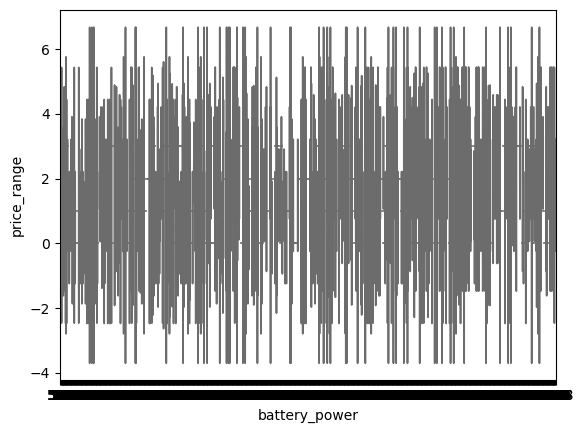

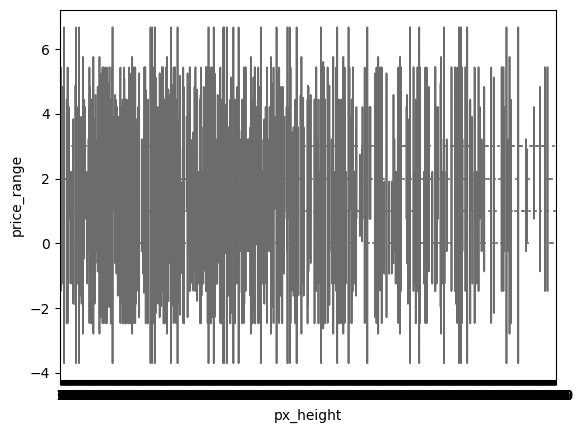

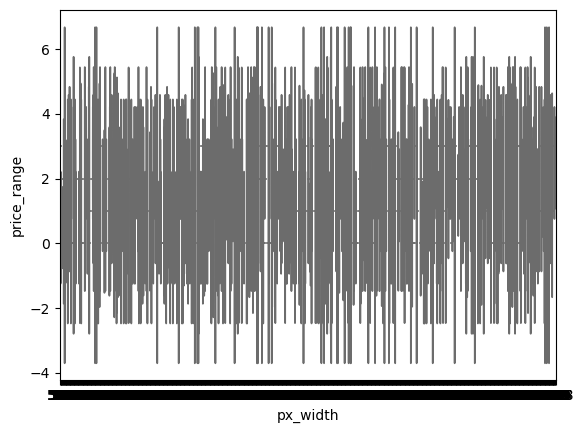

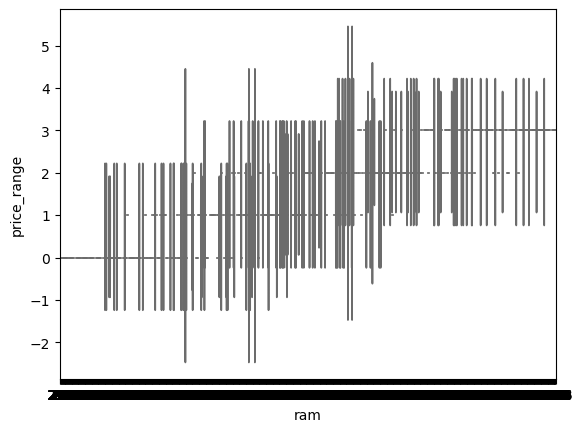

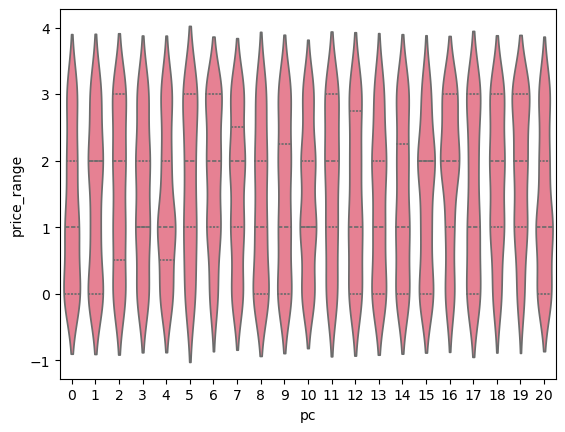

In [19]:
for cc in range(0,5):
    sns.violinplot(y=selected_columns[5], x=selected_columns[cc], data=dtst, inner='quartile')
    plt.show()

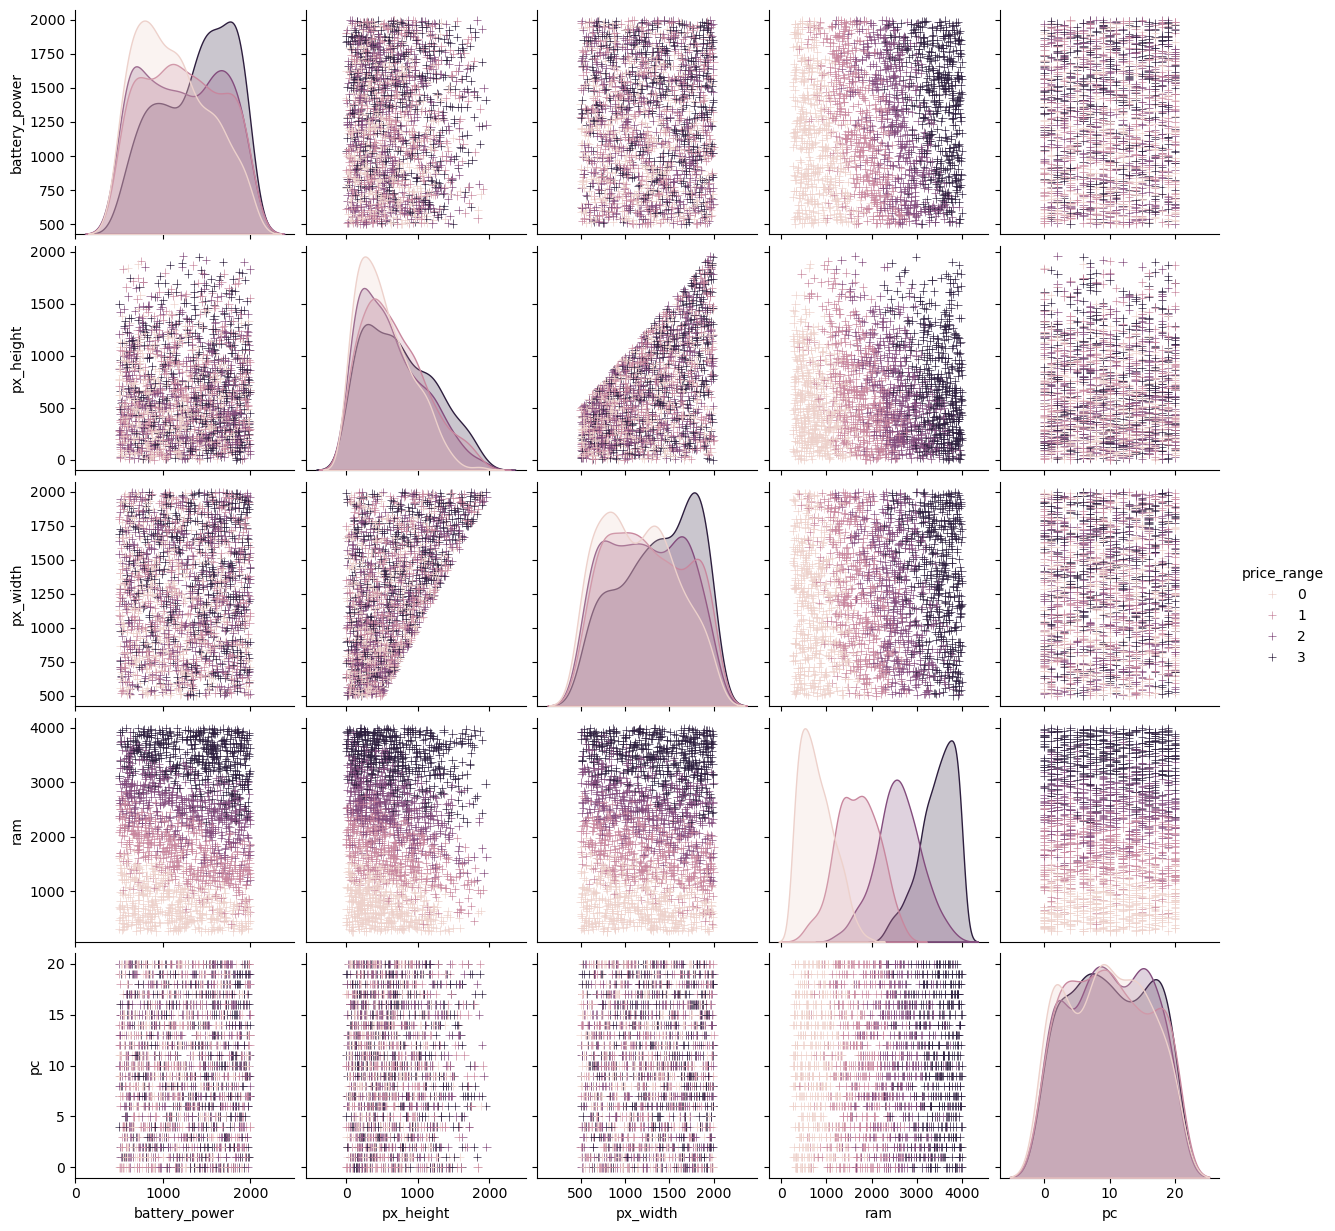

In [21]:
sns.pairplot(dtst, hue=selected_columns[5], markers='+')
plt.show()

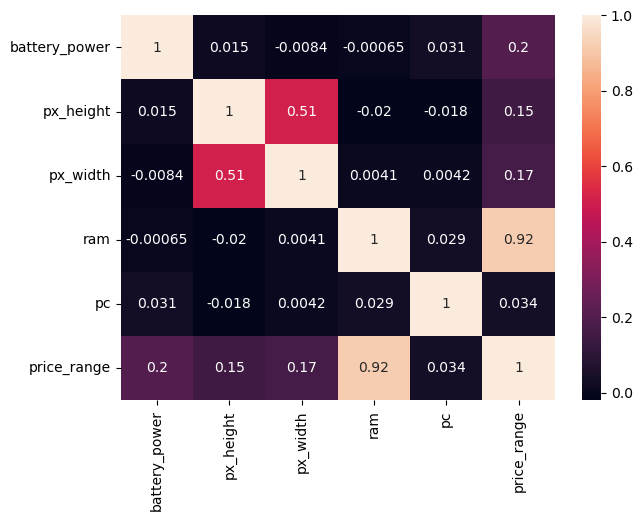

In [41]:
plt.figure(figsize=(7,5))
sns.heatmap(dtst.corr(numeric_only = True), annot=True)
plt.show()

In [88]:
X = dtst.drop(['price_range'], axis=1)
y = dtst['price_range']

import scipy.stats as stats

# почему важно перемешивать и делать train и test статистически не различимыми по целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=False)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.5497665088800532, pvalue=0.5825409778143822, df=1998.0)

In [60]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.753125 (0.133442)
LDA: 0.940625 (0.016117)
KNN: 0.920000 (0.016008)
CART: 0.838125 (0.030803)
NB: 0.791250 (0.025800)
SVC: 0.253125 (0.003125)


In [62]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.945
sk LDA prediction: [1 0 3 1 0 2 1 2 1 2 3 2 3 2 3 3 3 3 2 1 2 3 1 1 1 0 0 3 2 1 0 3 3 1 0 3 2
 1 2 3 2 2 3 1 1 1 1 0 2 1 0 1 0 3 0 3 1 2 3 3 1 1 1 3 1 1 2 1 1 1 3 0 1 1
 3 1 1 2 2 3 1 1 1 1 3 3 2 0 3 2 3 1 3 2 1 2 3 3 0 0 0 2 2 0 2 0 1 1 3 3 0
 1 2 0 2 0 2 2 2 0 2 0 2 0 2 1 2 3 1 3 0 0 2 2 3 3 1 2 1 1 3 1 0 2 1 0 1 2
 1 3 0 1 3 0 2 3 3 2 0 3 1 2 0 2 2 2 0 3 3 0 3 2 2 0 2 0 2 1 2 3 0 3 2 0 2
 1 2 3 1 1 3 1 1 1 3 0 1 0 1 2 0 1 3 3 1 2 1 0 0 1 0 1 0 0 1 3 3 1 0 2 0 3
 2 2 2 1 2 3 3 0 0 1 2 2 2 1 2 1 0 2 3 0 0 3 1 3 0 0 3 2 0 3 0 0 0 0 3 3 2
 0 0 0 0 3 0 2 3 2 3 3 2 2 1 0 2 0 0 1 1 1 2 1 0 0 3 0 1 2 0 3 1 0 0 3 0 2
 0 3 3 0 1 2 2 2 3 0 1 3 2 1 3 0 1 0 0 2 1 0 2 0 3 1 0 2 1 2 1 3 0 2 3 1 1
 1 2 1 3 2 2 2 2 3 1 0 0 0 0 2 1 2 1 0 1 3 0 3 0 3 3 1 2 0 2 1 1 0 2 0 0 2
 2 1 0 3 1 3 0 2 1 1 1 1 2 2 1 3 1 0 1 1 0 3 0 3 3 0 2 3 0 3]
sk transformed features
[[ -9.97736827 -12.47536631 -11.70940888 -12.33060741  -9.61479249]
 [  1.03552848   3.40123736   3.13902513   3.22159133 

C:\Users\eric1\AppData\Roaming\Python\Python312\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


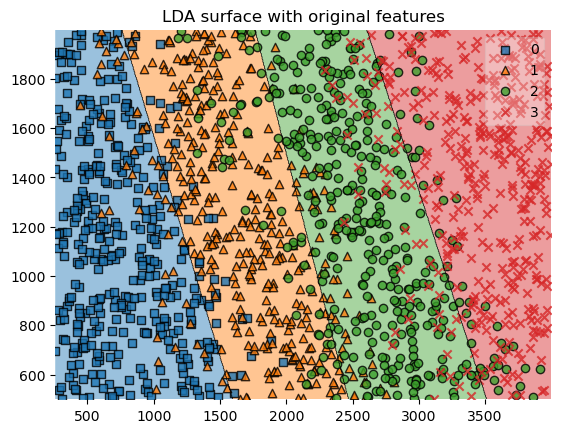

In [78]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
#y_s = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_s = y_train
X_2d= X_train[['ram',	'battery_power']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)
plt.show()

C:\Users\eric1\AppData\Roaming\Python\Python312\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


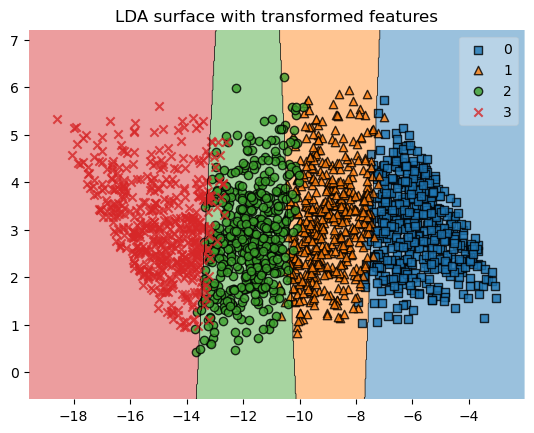

In [98]:
Xs = dtst[['ram',	'battery_power']]
ys = dtst['price_range'].values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)[:, :2]

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)
plt.show()

In [100]:
predicted = sk_lda2.predict(X1_lda_test)
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.95
Precision (confidence when predicting a 1): 0.95
Detail:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       124
           1       0.91      0.95      0.93       110
           2       0.91      0.94      0.93       125
           3       0.99      0.95      0.97       141

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

